In [99]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
directory = os.getcwd()
directory

'/workspaces/marketing-target-with-machine-learning'

<h2>1. Đọc dữ liệu với Pandas</h2>

In [100]:
train = pd.read_csv(directory+'/train.csv', delimiter=';')
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [101]:
test = pd.read_csv(directory+'/test.csv', delimiter=';')
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


<h2>2. Thống kê các đặc trưng của dữ liệu</h2>

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [103]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [104]:
train.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [105]:
train.groupby('job')['y'].value_counts(normalize=True)

job            y  
admin.         no     0.877973
               yes    0.122027
blue-collar    no     0.927250
               yes    0.072750
entrepreneur   no     0.917283
               yes    0.082717
housemaid      no     0.912097
               yes    0.087903
management     no     0.862444
               yes    0.137556
retired        no     0.772085
               yes    0.227915
self-employed  no     0.881571
               yes    0.118429
services       no     0.911170
               yes    0.088830
student        no     0.713220
               yes    0.286780
technician     no     0.889430
               yes    0.110570
unemployed     no     0.844973
               yes    0.155027
unknown        no     0.881944
               yes    0.118056
Name: proportion, dtype: float64

In [106]:
train.groupby('marital')['y'].value_counts(normalize=True)

marital   y  
divorced  no     0.880545
          yes    0.119455
married   no     0.898765
          yes    0.101235
single    no     0.850508
          yes    0.149492
Name: proportion, dtype: float64

In [107]:
train.groupby('education')['y'].value_counts(normalize=True)

education  y  
primary    no     0.913735
           yes    0.086265
secondary  no     0.894406
           yes    0.105594
tertiary   no     0.849936
           yes    0.150064
unknown    no     0.864297
           yes    0.135703
Name: proportion, dtype: float64

In [108]:
train.groupby('contact')['y'].value_counts(normalize=True)

contact    y  
cellular   no     0.850811
           yes    0.149189
telephone  no     0.865795
           yes    0.134205
unknown    no     0.959293
           yes    0.040707
Name: proportion, dtype: float64

In [109]:
train.groupby('month')['y'].value_counts(normalize=True)

month  y  
apr    no     0.803206
       yes    0.196794
aug    no     0.889867
       yes    0.110133
dec    no     0.532710
       yes    0.467290
feb    no     0.833522
       yes    0.166478
jan    no     0.898788
       yes    0.101212
jul    no     0.909065
       yes    0.090935
jun    no     0.897772
       yes    0.102228
mar    yes    0.519916
       no     0.480084
may    no     0.932805
       yes    0.067195
nov    no     0.898489
       yes    0.101511
oct    no     0.562331
       yes    0.437669
sep    no     0.535406
       yes    0.464594
Name: proportion, dtype: float64

<h2>3. Chuyển đổi dữ liệu</h2>

In [110]:
train[['default', 'housing', 'loan', 'y']] = train[['default', 'housing', 'loan', 'y']].replace({'yes': 1, 'no': 0}).astype(np.int8)
test[['default', 'housing', 'loan', 'y']] = test[['default', 'housing', 'loan', 'y']].replace({'yes': 1, 'no': 0}).astype(np.int8)

/tmp/ipykernel_13062/2383586341.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[['default', 'housing', 'loan', 'y']] = train[['default', 'housing', 'loan', 'y']].replace({'yes': 1, 'no': 0}).astype(np.int8)
/tmp/ipykernel_13062/2383586341.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['default', 'housing', 'loan', 'y']] = test[['default', 'housing', 'loan', 'y']].replace({'yes': 1, 'no': 0}).astype(np.int8)


In [111]:
le = LabelEncoder()
columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dict = {k:None for k in columns}
for column in columns:
    train[column] = le.fit_transform(train[column])
    test[column] = le.fit_transform(test[column])
    dict[column] = le.classes_.tolist()
dict

{'job': ['admin.',
  'blue-collar',
  'entrepreneur',
  'housemaid',
  'management',
  'retired',
  'self-employed',
  'services',
  'student',
  'technician',
  'unemployed',
  'unknown'],
 'marital': ['divorced', 'married', 'single'],
 'education': ['primary', 'secondary', 'tertiary', 'unknown'],
 'contact': ['cellular', 'telephone', 'unknown'],
 'month': ['apr',
  'aug',
  'dec',
  'feb',
  'jan',
  'jul',
  'jun',
  'mar',
  'may',
  'nov',
  'oct',
  'sep'],
 'poutcome': ['failure', 'other', 'success', 'unknown']}

In [113]:
X_train, y_train, X_test, y_test = train.drop(['y'], axis = 1).values, train['y'].values, test.drop(['y'], axis = 1).values, test['y'].values

<h2>4. Xây dựng mô hình dự đoán</h2>

<h3>4.1. Mô hình Học máy</h3>

In [114]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<BarContainer object of 16 artists>

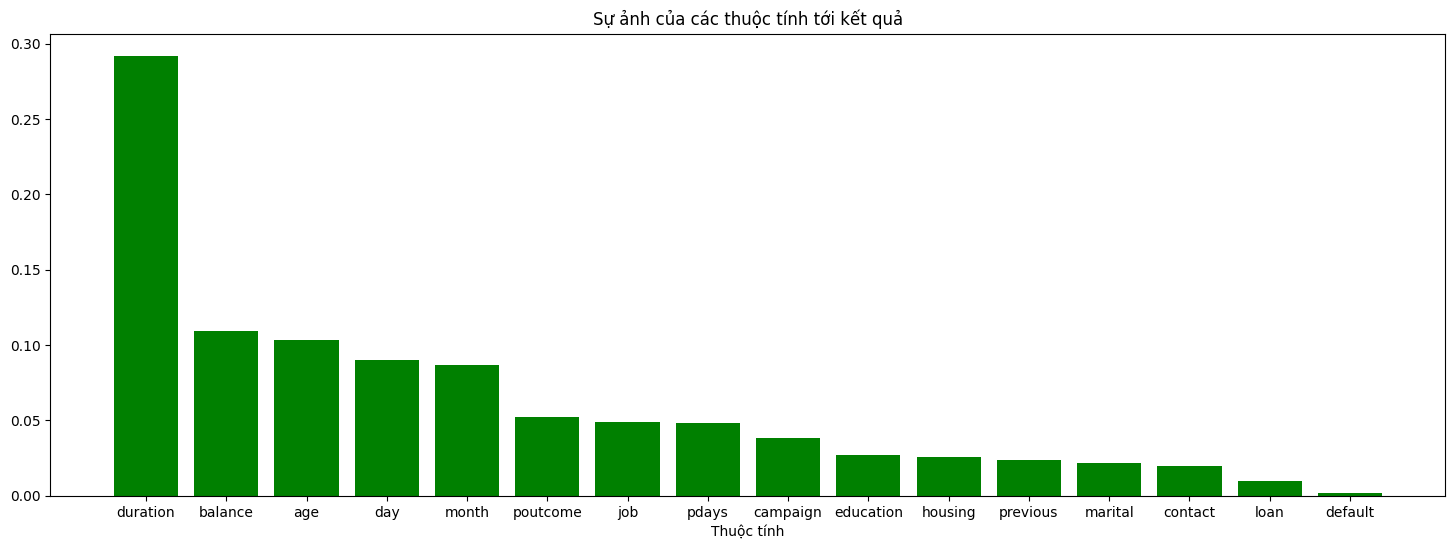

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,6))
ax.set(xlabel='Thuộc tính', title='Sự ảnh của các thuộc tính tới kết quả')
feature_imp = pd.Series(model.feature_importances_,index=train.drop('y', axis=1).columns).sort_values(ascending=False)
ax.bar(feature_imp.keys(), feature_imp.values, color='g')

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

1.0

In [117]:
joblib.dump((model, dict), "model.joblib")

['model.joblib']